In [1]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "./"
categories = ["corgi", "golden" ,"dach" ,"husky" ,"beagle"] # 각 카테고리 폴더에서 불러오기
nb_classes = len(categories)

image_w = 100
image_h = 100

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 airplanes
#0 1 0 0 이면 buddha 이런식


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("./multi_image_data.npy", xy)

print("ok", len(y))

corgi  파일 길이 :  970
corgi  :  .//corgi\corgi 10.jpg
corgi  :  .//corgi\corgi2909.jpg
golden  파일 길이 :  799
golden  :  .//golden\gold (1).jpg
golden  :  .//golden\gold_dog665.jpg
dach  파일 길이 :  945
dach  :  .//dach\dachs.jpg
dach  :  .//dach\docss (67).jpg
husky  파일 길이 :  502
husky  :  .//husky\husky1.jpg
beagle  파일 길이 :  803
beagle  :  .//beagle\beagle (1).jpg
beagle  :  .//beagle\beagle645.jpg
ok 4019


In [25]:
os.listdir(caltech_dir)

['.idea',
 '.ipynb_checkpoints',
 'beagle',
 'chromedriver.exe',
 'corgi',
 'dach',
 'golden',
 'google_crol.py',
 'husky',
 'multi_image_data.npy',
 'multi_labels.py',
 'name_jpg_change.py',
 'naver_crol.py',
 'shuffle_test_selection.py',
 'Untitled.ipynb',
 'venv']

In [26]:
beagle_dir=os.path.join(caltech_dir,'beagle')
os.listdir(beagle_dir)[:10]


['beagle (1).jpg',
 'beagle (10).jpg',
 'beagle (100).jpg',
 'beagle (101).jpg',
 'beagle (102).jpg',
 'beagle (103).jpg',
 'beagle (104).jpg',
 'beagle (105).jpg',
 'beagle (106).jpg',
 'beagle (107).jpg']

In [27]:
img_name='beagle 199.jpg'
img_path = os.path.join(beagle_dir, img_name)


from keras.preprocessing import image
img = image.load_img(img_path, target_size=(100, 100))
img_tensor = image.img_to_array(img)

img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor.shape

(1, 100, 100, 3)

### 각각 디렉토리 지정해주고 파일 불러와서 이미지 3d 텐서 => 4d 텐서 확인

# 사용자 정의함수를 통해 2801개를 불러오기

In [28]:
def preprocess_img(img_path, target_size=100):
    from keras.preprocessing import image
    
    img = image.load_img(img_path, target_size=(target_size, target_size))
    img_tensor = image.img_to_array(img)
    
    # expand a dimension
    img_tensor = np.expand_dims(img_tensor, axis=0)
    
    #scaling into [0,1]
    img_tensor /=255.
    
    return img_tensor

# 위에서 이미지 4000장 불러오면서 이미지벡터화 시킴.

In [2]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn
#import pydot
import h5py

import tensorflow
import keras

print('scipy ' + scipy.__version__)
print('numpy ' + numpy.__version__)
print('matplotlib ' + matplotlib.__version__)
print('pandas ' + pandas.__version__)
print('sklearn ' + sklearn.__version__)
print('h5py ' + h5py.__version__)
print('tensorflow ' + tensorflow.__version__)
print('keras ' + keras.__version__)

scipy 1.4.1
numpy 1.18.1
matplotlib 3.1.2
pandas 1.0.0
sklearn 0.22.1
h5py 2.10.0
tensorflow 2.0.0
keras 2.2.4


Using TensorFlow backend.


In [21]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2861096568976900000
]


In [2]:
import os, glob, numpy as np
import tensorflow.keras as keras
# module 'tensorflow' has no attribute 'get_default_graph'

from keras.models import Model, Input #고쳐야만 아래 소스 구동
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.python.framework import ops
ops.reset_default_graph()
import tensorflow as tf
'''
config = tf.ConfigProto()  텐서플로우 2. 에서 구동안됨
module 'tensorflow' has no attribute 'ConfigProto'
'''
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

# session = tf.Session(config=config) 자동세션기능
X_train, X_test, y_train, y_test = np.load('./multi_image_data.npy',allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])

C:\Users\ICT01_02\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_02\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_02\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_02\Anaconda3\envs\tf_test\lib\site-packages

(3014, 100, 100, 3)
3014


In [3]:
categories = ["corgi", "golden" ,"dach" ,"husky" ,"beagle"]
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255



#세개의 모델에서 같은 형태의 데이터를 사용할 것, 모든 모델에서 사용할 단일 입력 레이어를 정의.
input_shape =X_train[0,:,:,:].shape
model_input = keras.Input(shape =input_shape)

In [5]:
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='test_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='test_loss', patience=6)
    
model.summary()

AttributeError: module 'tensorflow.python.keras.api._v1.keras.backend' has no attribute 'device'

In [15]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])


Train on 3014 samples, validate on 1005 samples
Epoch 1/20
3014/3014 [==============================] - 51s 17ms/step - loss: 1.5641 - accuracy: 0.2880 - val_loss: 1.3516 - val_accuracy: 0.4070
Epoch 2/20


C:\Users\ICT01_02\Anaconda3\envs\tf_test\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with test_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
C:\Users\ICT01_02\Anaconda3\envs\tf_test\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `test_loss` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


3014/3014 [==============================] - 50s 17ms/step - loss: 1.3495 - accuracy: 0.3908 - val_loss: 1.2778 - val_accuracy: 0.4587
Epoch 3/20
3014/3014 [==============================] - 50s 16ms/step - loss: 1.2899 - accuracy: 0.4297 - val_loss: 1.2721 - val_accuracy: 0.4806
Epoch 4/20
3014/3014 [==============================] - 50s 16ms/step - loss: 1.2431 - accuracy: 0.4363 - val_loss: 1.2280 - val_accuracy: 0.4348
Epoch 5/20
3014/3014 [==============================] - 50s 17ms/step - loss: 1.2119 - accuracy: 0.4602 - val_loss: 1.1643 - val_accuracy: 0.4816
Epoch 6/20
3014/3014 [==============================] - 49s 16ms/step - loss: 1.1904 - accuracy: 0.4784 - val_loss: 1.1632 - val_accuracy: 0.4796
Epoch 7/20
3014/3014 [==============================] - 49s 16ms/step - loss: 1.1448 - accuracy: 0.4871 - val_loss: 1.0696 - val_accuracy: 0.5632
Epoch 8/20
3014/3014 [==============================] - 50s 17ms/step - loss: 1.1104 - accuracy: 0.5113 - val_loss: 1.0932 - val_accura

In [16]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

1005/1005 [==============================] - 4s 4ms/step
정확도 : 0.6667


In [48]:
history.history

{'val_loss': [1.2196925341786438,
  1.0214012981054201,
  0.8823833470913901,
  0.7827238837581368,
  0.722322225155522,
  0.6704809601034099,
  0.6308294287368433,
  0.7172469720318543,
  0.5936917822752426,
  0.6223241010708596,
  0.6416264389877888,
  0.6086906460980278,
  0.6279891821875501,
  0.6774123392294888,
  0.698136173848489,
  0.6865273862335812,
  0.7689774176374596,
  0.7221927361701852,
  0.8579677719381911,
  0.6964496313635983],
 'val_accuracy': [0.482587069272995,
  0.5950248837471008,
  0.6517412662506104,
  0.6955223679542542,
  0.7064676880836487,
  0.7572139501571655,
  0.7751243710517883,
  0.7731343507766724,
  0.8009950518608093,
  0.7970149517059326,
  0.7830845713615417,
  0.806965172290802,
  0.8109452724456787,
  0.8129353523254395,
  0.8179104328155518,
  0.8079602122306824,
  0.8129353523254395,
  0.8029850721359253,
  0.800000011920929,
  0.8149253726005554],
 'loss': [1.3875916107806767,
  1.091302579613656,
  0.9504211111897732,
  0.8600206973146111,


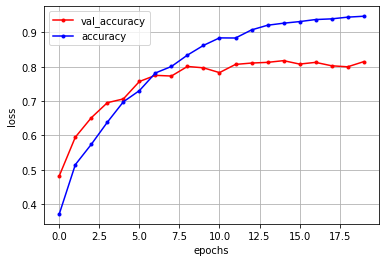

In [49]:
y_vloss = history.history['val_accuracy']
y_loss = history.history['accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_accuracy')
plt.plot(x_len, y_loss, marker='.', c='blue', label='accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

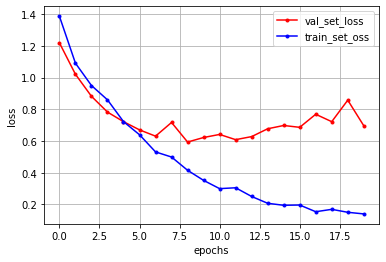

In [47]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

# 모델 앙상블하기
https://github.com/KerasKorea/KEKOxTutorial/blob/master/16_Ensembling%20ConvNets%20using%20Keras.md

https://github.com/mmxmb/keras_ensemblng/blob/master/keras_ensembling.ipynb

In [ ]:
# 새로운 모델에 적용하기

In [50]:
from keras.models import Model, Input
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, Average
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.callbacks import History
from keras.engine import training
from keras.optimizers import Adam
from typing import Tuple, List

import glob
import numpy as np
from tensorflow.python.framework import ops
ops.reset_default_graph()
import tensorflow as tf
'''
config = tf.ConfigProto()  텐서플로우 2. 에서 구동안됨
module 'tensorflow' has no attribute 'ConfigProto'
'''
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

# session = tf.Session(config=config) 자동세션기능
X_train, X_test, y_train, y_test = np.load('./multi_image_data.npy',allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])

(3014, 100, 100, 3)
3014


In [ ]:
# 현재 작업 폴더 얻기 os.getcwd()
'''
CONV_POOL_CNN_WEIGHT_FILE = os.path.join(os.getcwd(), 'weights', 'conv_pool_cnn_pretrained_weights.hdf5')
ALL_CNN_WEIGHT_FILE = os.path.join(os.getcwd(), 'weights', 'all_cnn_pretrained_weights.hdf5')
NIN_CNN_WEIGHT_FILE = os.path.join(os.getcwd(), 'weights', 'nin_cnn_pretrained_weights.hdf5')
''' 에러나서 현재 못씀

In [51]:
categories = ["corgi", "golden" ,"dach" ,"husky" ,"beagle"]
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

print('X_train shape: {} | y_train shape: {}\nX_test shape : {} | y_test shape : {}'.format(
    X_train.shape, y_train.shape, X_test.shape, y_test.shape))


#세개의 모델에서 같은 형태의 데이터를 사용할 것, 모든 모델에서 사용할 단일 입력 레이어를 정의.
input_shape =X_train[0,:,:,:].shape
model_input = Input(shape =input_shape)

X_train shape: (3014, 100, 100, 3) | y_train shape: (3014, 5)
X_test shape : (1005, 100, 100, 3) | y_test shape : (1005, 5)


In [ ]:
# 모델보다 작아서 훈련이 훨씬 빠름. 최종 Conv2D
def nin_cnn(model_input):
    
    #mlpconv block 1
    x = Conv2D(32, (5, 5), activation='relu',padding='valid')(model_input)
    x = Conv2D(32, (1, 1), activation='relu')(x)
    x = Conv2D(32, (1, 1), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.5)(x)
    
    #mlpconv block2
    x = Conv2D(64, (3, 3), activation='relu',padding='valid')(x)
    x = Conv2D(64, (1, 1), activation='relu')(x)
    x = Conv2D(64, (1, 1), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.5)(x)
    
    #mlpconv block3
    x = Conv2D(128, (3, 3), activation='relu',padding='valid')(x)
    x = Conv2D(32, (1, 1), activation='relu')(x)
    x = Conv2D(10, (1, 1))(x)
    
    x = GlobalAveragePooling2D()(x)
    x = Activation(activation='softmax')(x)
    
    model = Model(model_input, x, name='nin_cnn')
    
    return model


nin_cnn_model = nin_cnn(model_input)
nin_cnn_model.summary()

In [53]:
''' 단순화를 위해 각 모델은 동일한 매개변수를 사용하여 compile 되고 train
32 배치사이즈로 1 epoch 당 1250번의 stpe??) 20 epoch로 사용하면 3가지 모델중 어떤모델이라도
국소 최소치(local minimum)를 얻는데는 충분할 것으로 보임. 
훈련데이터 세트에서 무작위로 validation_split = 20% 데이터 검증으로 사용'''

def compile_and_train(model, num_epochs):
    model.compile(loss = categorical_crossentropy, optimizer=Adam(), metrics=['acc'])
    '''filepath = 'weights/' + model.name + '.{epoch:02d}-{loss:.2f}.hdf5'
    checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=0, 
                                 save_weights_only=True, save_best_only=True, mode='auto', period=1)
    tensor_board = TensorBoard(log_dir='logs/', histogram_freq=0, batch_size=32)
    '''
    history= model.fit(x=X_train, y=y_train, batch_size=32, epochs=num_epochs, verbose=1,
                       validation_split =0.2) #callbacks=[checkpoint, tensor_board]
    
    # 위에서 weight 에러나서 callback 실현못함.. 누가 알아내줭

In [ ]:
_ = compile_and_train(nin_cnn_model, num_epochs=20)

In [ ]:
try:
    nin_cnn_weight_file
except NameError:
    nin_cnn_model.load_weights(NIN_CNN_WEIGHT_FILE)
evaluate_error(nin_cnn_model)

Train on 2411 samples, validate on 603 samples
Epoch 1/20
2411/2411 [==============================] - 414s 172ms/step - loss: 1.5662 - acc: 0.2298 - val_loss: 1.5298 - val_acc: 0.2338
Epoch 2/20
 224/2411 [=>............................] - ETA: 5:59 - loss: 1.5145 - acc: 0.2321

In [ ]:
def evaluate_error(model):
    pred = model.predict(X_test, batch_size=32)
    pred = np.argmax(pred, axis=1)
    pred = np.expand_dims(pred, axis=1) # make same shape as y_test
    error = np.sum(np.not_equal(pred, y_test))/ y_test.shape[0]
    return error

# 모델 평가, 테스트세트의 에러율 계산하기
'''
try:
    conv_pool_cnn_weight_file
except NameError:
    conv_pool_cnn_model.load_weights(CONV_POOL_CNN_WEIGHT_FILE)   
evaluate_error(conv_pool_cnn_model)'''

evaluate_error(all_cnn_model)

# Three Model Ensemble

In [ ]:
conv_pool_cnn_model = conv_pool_cnn(model_input)
all_cnn_model = all_cnn(model_input)
nin_cnn_model = nin_cnn(model_input)

conv_pool_cnn_model.load_weights('weights/conv_pool_cnn.29-0.10.hdf5')
all_cnn_model.load_weights('weights/all_cnn.30-0.08.hdf5')
nin_cnn_model.load_weights('weights/nin_cnn.30-0.93.hdf5')

models = [conv_pool_cnn_model, all_cnn_model, nin_cnn_model]


'''conv_pool_cnn_model = conv_pool_cnn(model_input)
all_cnn_model = all_cnn(model_input)
nin_cnn_model = nin_cnn(model_input)


try:
    conv_pool_cnn_model.load_weights(conv_pool_cnn_weight_file)
except NameError:
    conv_pool_cnn_model.load_weights(CONV_POOL_CNN_WEIGHT_FILE)
try:
    all_cnn_model.load_weights(all_cnn_weight_file)
except NameError:
    all_cnn_model.load_weights(ALL_CNN_WEIGHT_FILE)
try:
    nin_cnn_model.load_weights(nin_cnn_weight_file)
except NameError:
    nin_cnn_model.load_weights(NIN_CNN_WEIGHT_FILE)


models = [conv_pool_cnn_model, all_cnn_model, nin_cnn_model]'''

In [ ]:
def ensemble(models, model_input):
    
    outputs = [model.outputs[0] for model in models]
    y = Average()(outputs)
    
    model = Model(model_input, y, name='ensemble')
    
    return model

ensemble_model = ensemble(models, model_input)

evaluate_error(ensemble_model)